In [ ]:
Lorenzo Zullo Section C

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [ ]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('titanic.csv')
# print(data.head())


    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass  Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    1      1         0         A/5 21171    Mr            1  
1       1    0      1         1          PC 17599   Mrs            1  
2       3    0      0         1  STON/O2. 3101282  Miss            0  
3       1    0      1         1            11380

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [5]:
# number of passengers
num_passengers = len(data)
print(num_passengers)
# percetage male 
num_male = len(data[data['Sex'] == 1])
print(num_male)
# number of survivors
num_survivors = len(data[data['Survived'] == 1])
percentage_survivors = num_survivors / num_passengers * 100
print(percentage_survivors)


891
577
38.38383838383838


Your written answer:

- 891
- 577
- 38.38383838383838

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [12]:
# number of survivors by gender

df_male = data[data['Sex'] == 1]
num_male_survivor = len(df_male[df_male['Survived'] == 1 ])
percentage_male_survivors = (num_male_survivor / len(df_male)) * 100

print(percentage_male_survivors)


df_female = data[data['Sex'] == 0]
num_female_survivor = len(df_female[df_female['Survived'] == 1 ])
percentage_female_survivors = (num_female_survivor / len(df_female)) * 100

print(percentage_female_survivors)



18.890814558058924
74.20382165605095


Your written answer:

 - 18.89
 - 74.20

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [14]:
# number of survivors and tickets by class
df_class1 = data[data['Pclass'] == 1]
num_class1_survivor = len(df_class1[df_class1['Survived'] == 1 ])
percentage_class1_survivors = (num_class1_survivor / len(df_class1)) * 100

num_class1_tickets = len(df_class1)
percentage_class1_tickets = (num_class1_tickets / num_passengers) * 100

print(percentage_class1_survivors)
print(percentage_class1_tickets)

df_class2 = data[data['Pclass'] == 2]
num_class2_survivor = len(df_class2[df_class2['Survived'] == 1 ])
percentage_class2_survivors = (num_class2_survivor / len(df_class2)) * 100

num_class2_tickets = len(df_class2)
percentage_class2_tickets = (num_class2_tickets / num_passengers) * 100

print(percentage_class2_survivors)
print(percentage_class2_tickets)

df_class3 = data[data['Pclass'] == 3]
num_class3_survivor = len(df_class3[df_class3['Survived'] == 1 ])
percentage_class3_survivors = (num_class3_survivor / len(df_class3)) * 100

num_class3_tickets = len(df_class3)
percentage_class3_tickets = (num_class3_tickets / num_passengers) * 100

print(percentage_class3_survivors)
print(percentage_class3_tickets)

62.96296296296296
24.242424242424242
47.28260869565217
20.65095398428732
24.236252545824847
55.106621773288445


Your written answer:

 - Class 1 
    - % tickets: 62.96
    - % survivorship: 24.24
 - Class 2 
    - % tickets: 47.28
    - % survivorship: 20.65
 - Class 3
    - % tickets: 24.24
    - % survivorship: 55.11


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

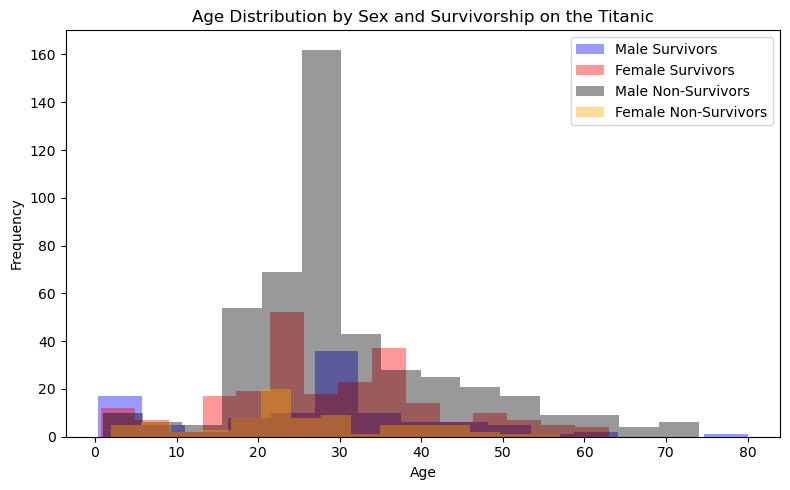

In [54]:
# Split data into survivors and non-survivors with specified columns
df_survivors = data[data['Survived'] == 1][['Age', 'Name', 'Sex']]
df_nonsurvivors = data[data['Survived'] == 0][['Age', 'Name', 'Sex']]
# print(df_survivors.head())
# print(df_nonsurvivors.head())

plt.figure(figsize=(8, 5))

# Male survivors
plt.hist(df_survivors[df_survivors['Sex'] == 1]['Age'], bins=15, 
         color='blue', alpha=0.4, label='Male Survivors', histtype='stepfilled')

# Female survivors
plt.hist(df_survivors[df_survivors['Sex'] == 0]['Age'], bins=15, 
         color='red', alpha=0.4, label='Female Survivors', histtype='stepfilled')

# Male non-survivors
plt.hist(df_nonsurvivors[df_nonsurvivors['Sex'] == 1]['Age'], bins=15, 
         color='black', alpha=0.4, label='Male Non-Survivors', histtype='stepfilled')

# Female non-survivors
plt.hist(df_nonsurvivors[df_nonsurvivors['Sex'] == 0]['Age'], bins=15, 
         color='orange', alpha=0.4, label='Female Non-Survivors', histtype='stepfilled')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Sex and Survivorship on the Titanic')
plt.legend()
plt.tight_layout()  
plt.show()



### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

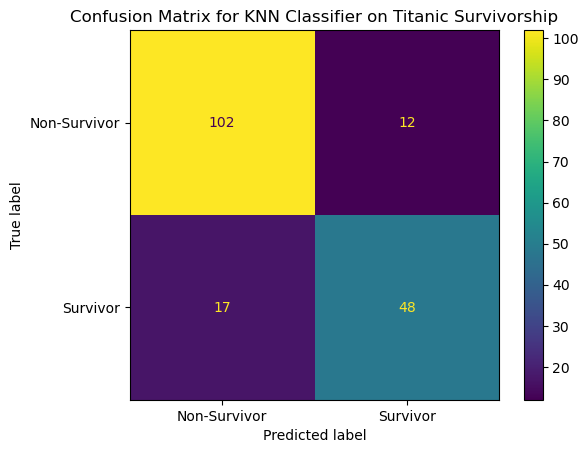

Accuracy: 0.8379888268156425
Precision: 0.8
Recall: 0.7384615384615385


In [92]:

# KNN Classifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, classification_report

features = ['Pclass', 'Age', 'Sex']
label = 'Survived'

X_train, X_test, y_train, y_test = train_test_split(data[features], data[label], test_size=0.2)

ss = StandardScaler()

Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel()
ys_test =  y_test.values.ravel()

knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(Xs_train, ys_train)

y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

knn_confmat = confusion_matrix(y_test, y_knn_test)

ConfusionMatrixDisplay(knn_confmat, display_labels=['Non-Survivor', 'Survivor']).plot()
plt.title("Confusion Matrix for KNN Classifier on Titanic Survivorship")
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_knn_test)}")
print(f"Precision: {precision_score(y_test, y_knn_test)}")
print(f"Recall: {recall_score(y_test, y_knn_test)}")



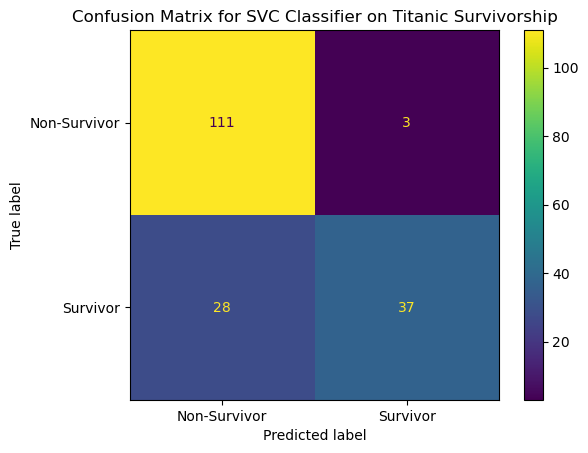

Accuracy: 0.8268156424581006
Precision: 0.925
Recall: 0.5692307692307692


In [95]:
from sklearn.svm import SVC

svc_clf = SVC(kernel='rbf', gamma = 1)
svc_clf.fit(Xs_train, ys_train)

y_svc_train = svc_clf.predict(Xs_train)
y_svc_test = svc_clf.predict(Xs_test)

svc_confmat = confusion_matrix(y_test, y_svc_test)

ConfusionMatrixDisplay(svc_confmat, display_labels=['Non-Survivor', 'Survivor']).plot()
plt.title("Confusion Matrix for SVC Classifier on Titanic Survivorship")
plt.show()

print(f"Accuracy: {accuracy_score(y_test, y_svc_test)}")
print(f"Precision: {precision_score(y_test, y_svc_test)}")
print(f"Recall: {recall_score(y_test, y_svc_test)}")


#### **Questions**

KNN-
Accuracy: 0.84
Precision: 0.8
Recall: 0.74

SVC-
Accuracy: 0.83
Precision: 0.93
Recall: 0.57

How does the model performance on the test data compare to the performance on the training data? 
 
 - Both models had about an 85% accuraccy


Which models did you fit and which worked better?
 
 - I think that the SVC model was marginally better than the KNN one, but it had a worse recall. 